In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from math import log10

# Read data

In [2]:
df = pd.read_excel('Toughest Sport by Skill.xlsx')

# Explore data

In [3]:
df.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


### Shape

In [4]:
df.shape

(60, 13)

### Columns Name

In [5]:
df.columns

Index(['Sport', 'Endurance', 'Strength', 'Power', 'Speed', 'Agility',
       'Flexibility', 'Nerve', 'Durability', 'Hand-Eye Coordination',
       'Analytical Aptitude', 'Total', 'Rank'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sport                  60 non-null     object 
 1   Endurance              60 non-null     float64
 2   Strength               60 non-null     float64
 3   Power                  60 non-null     float64
 4   Speed                  60 non-null     float64
 5   Agility                60 non-null     float64
 6   Flexibility            60 non-null     float64
 7   Nerve                  60 non-null     float64
 8   Durability             60 non-null     float64
 9   Hand-Eye Coordination  60 non-null     float64
 10  Analytical Aptitude    60 non-null     float64
 11  Total                  60 non-null     float64
 12  Rank                   60 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 6.2+ KB


In [7]:
df.describe()

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.077667,5.169000,5.509167,4.815000,4.765000,4.723167,4.614833,4.612833,4.954833,4.767333,48.983333,30.400000
std,2.094217,1.715357,1.980397,2.266403,1.927273,1.704369,2.442645,1.882102,1.966328,1.576830,12.170519,17.473661
min,1.000000,1.000000,1.250000,0.630000,1.000000,1.130000,0.880000,0.750000,1.880000,2.250000,14.500000,1.000000
25%,3.500000,3.880000,4.097500,3.000000,3.437500,3.847500,2.597500,3.380000,3.130000,3.437500,44.093750,15.750000
50%,4.630000,5.190000,5.690000,5.130000,4.755000,4.750000,4.190000,4.630000,4.440000,4.250000,48.000000,30.000000
75%,6.660000,6.130000,7.130000,6.410000,6.380000,5.532500,6.532500,5.782500,6.630000,6.160000,56.031250,45.250000
max,9.630000,9.250000,9.750000,9.880000,8.250000,10.000000,9.880000,8.500000,9.250000,7.500000,72.375000,60.000000


## Missing value

In [8]:
df.isnull().sum()

Sport                    0
Endurance                0
Strength                 0
Power                    0
Speed                    0
Agility                  0
Flexibility              0
Nerve                    0
Durability               0
Hand-Eye Coordination    0
Analytical Aptitude      0
Total                    0
Rank                     0
dtype: int64

In [9]:
df.isna().sum()

Sport                    0
Endurance                0
Strength                 0
Power                    0
Speed                    0
Agility                  0
Flexibility              0
Nerve                    0
Durability               0
Hand-Eye Coordination    0
Analytical Aptitude      0
Total                    0
Rank                     0
dtype: int64

# Create function for visualisation

In [33]:
def make_c_bar(d,sport,r = 1.5):
    labels = list(d.columns[1:-2])
    stats = d.loc[d['Sport'] == sport]
    stats_list = d.values[stats.index].tolist()
    flat_list = [item for sublist in stats_list for item in sublist]
    l = flat_list[1:-2]
    data = [round((x*10),2) for x in l]
    n = len(data)
    #find max value for full ring
    k,m = 100,100
    #calculate width of each ring
    w = r / n 

    #create colors along a chosen colormap
    colors = [cm.terrain(i / n) for i in range(n)]

    #create figure, axis
    fig, ax = plt.subplots(figsize=(10,10))
    ax.axis("equal")
    ax.set_title(sport, x=0.5,y=1.2,fontsize=30)
    #create rings of donut chart
    for i in range(n):
        innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white")
    
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
    plt.show()
    

## Subset Top Five Sport

In [30]:
subset_df = df[['Sport','Endurance','Strength','Power','Speed','Agility','Flexibility','Nerve','Durability','Hand-Eye Coordination','Analytical Aptitude']]
subset_df = subset_df.set_index('Sport')
top_five = subset_df.head(5)
subset_df.head(10)

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
Sport,,,,,,,,,,
Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38
Martial Arts,5.00,5.88,7.75,6.38,6.00,7.00,6.63,5.88,6.00,6.88
Tennis,7.25,5.13,7.13,6.75,7.75,5.63,3.00,5.00,8.38,6.75
Gymnastics,5.38,6.13,6.63,5.00,6.38,10.00,7.50,6.88,4.50,4.13
Baseball/Softball,4.63,5.75,7.63,6.50,6.75,4.75,5.13,5.63,9.25,6.25


In [31]:
subset_df.head()

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
Sport,,,,,,,,,,
Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38


<AxesSubplot:>

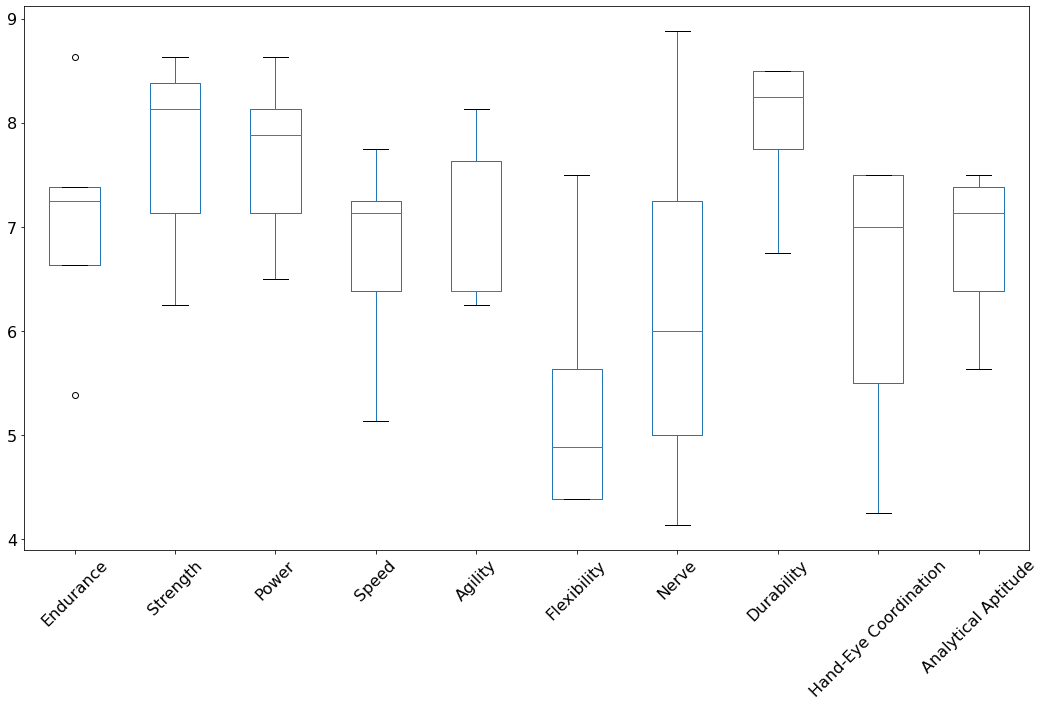

In [13]:
top_five.boxplot(figsize=(18,10),rot=45, fontsize=16,grid=False)

### Find the sport with the most endurance

In [14]:
df.iloc[df['Endurance'].idxmax()]['Sport']

'Cycling: Distance'

### Find the sport with the most strength

In [15]:
df.iloc[df['Strength'].idxmax()]['Sport']

'Weight-Lifting'

### Find the sport with the most power

In [16]:
df.iloc[df['Power'].idxmax()]['Sport']

'Weight-Lifting'

### Find the sport with the most speed

In [17]:
df.iloc[df['Speed'].idxmax()]['Sport']

'Track and Field: Sprints'

### Find the sport with the most agility

In [18]:
df.iloc[df['Agility'].idxmax()]['Sport']

'Soccer'

### Find the sport with the most flexibility

In [19]:
df.iloc[df['Flexibility'].idxmax()]['Sport']

'Gymnastics'

### Find the sport with the most nerve

In [20]:
df.iloc[df['Nerve'].idxmax()]['Sport']

'Auto Racing'

### Find the sport with the most durability

In [21]:
df.iloc[df['Durability'].idxmax()]['Sport']

'Boxing'

### Find the sport with the most Hand-Eye Coordination

In [22]:
df.iloc[df['Hand-Eye Coordination'].idxmax()]['Sport']

'Baseball/Softball'

### Find the sport with the most Analytical Aptitude

In [23]:
df.iloc[df['Analytical Aptitude'].idxmax()]['Sport']

'Ice Hockey'

We see that a sport of sports has the maximum values for two abilities, the Weight-Lifting

### Last Sport Rank

In [25]:
df.tail()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
55,Curling,2.25,2.63,2.50,1.50,2.25,2.63,1.75,1.50,4.88,5.63,27.500,56
56,Bowling,2.25,2.75,3.38,1.00,1.88,2.38,1.63,1.25,4.75,4.13,25.375,57
57,Shooting,2.25,2.50,1.38,0.88,1.13,1.75,2.38,1.88,6.75,4.00,24.875,58
58,Billiards,1.00,1.00,1.75,0.75,1.00,2.63,1.63,0.75,5.25,5.75,21.500,59
59,Fishing,1.38,1.63,1.25,0.63,1.50,1.13,0.88,0.88,2.38,2.88,14.500,60


### Exemple of execution function

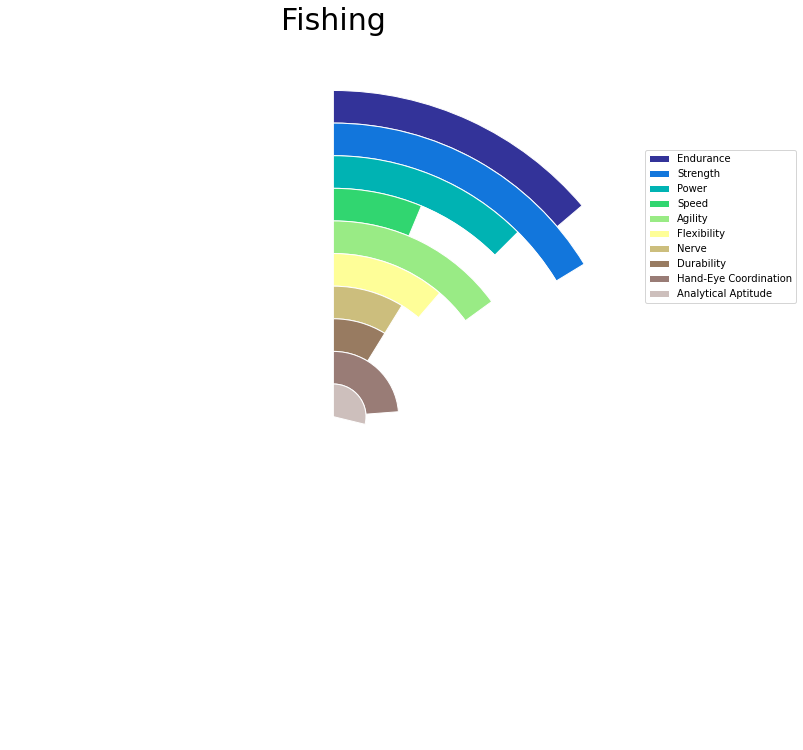

In [35]:
make_c_bar(df,'Fishing')

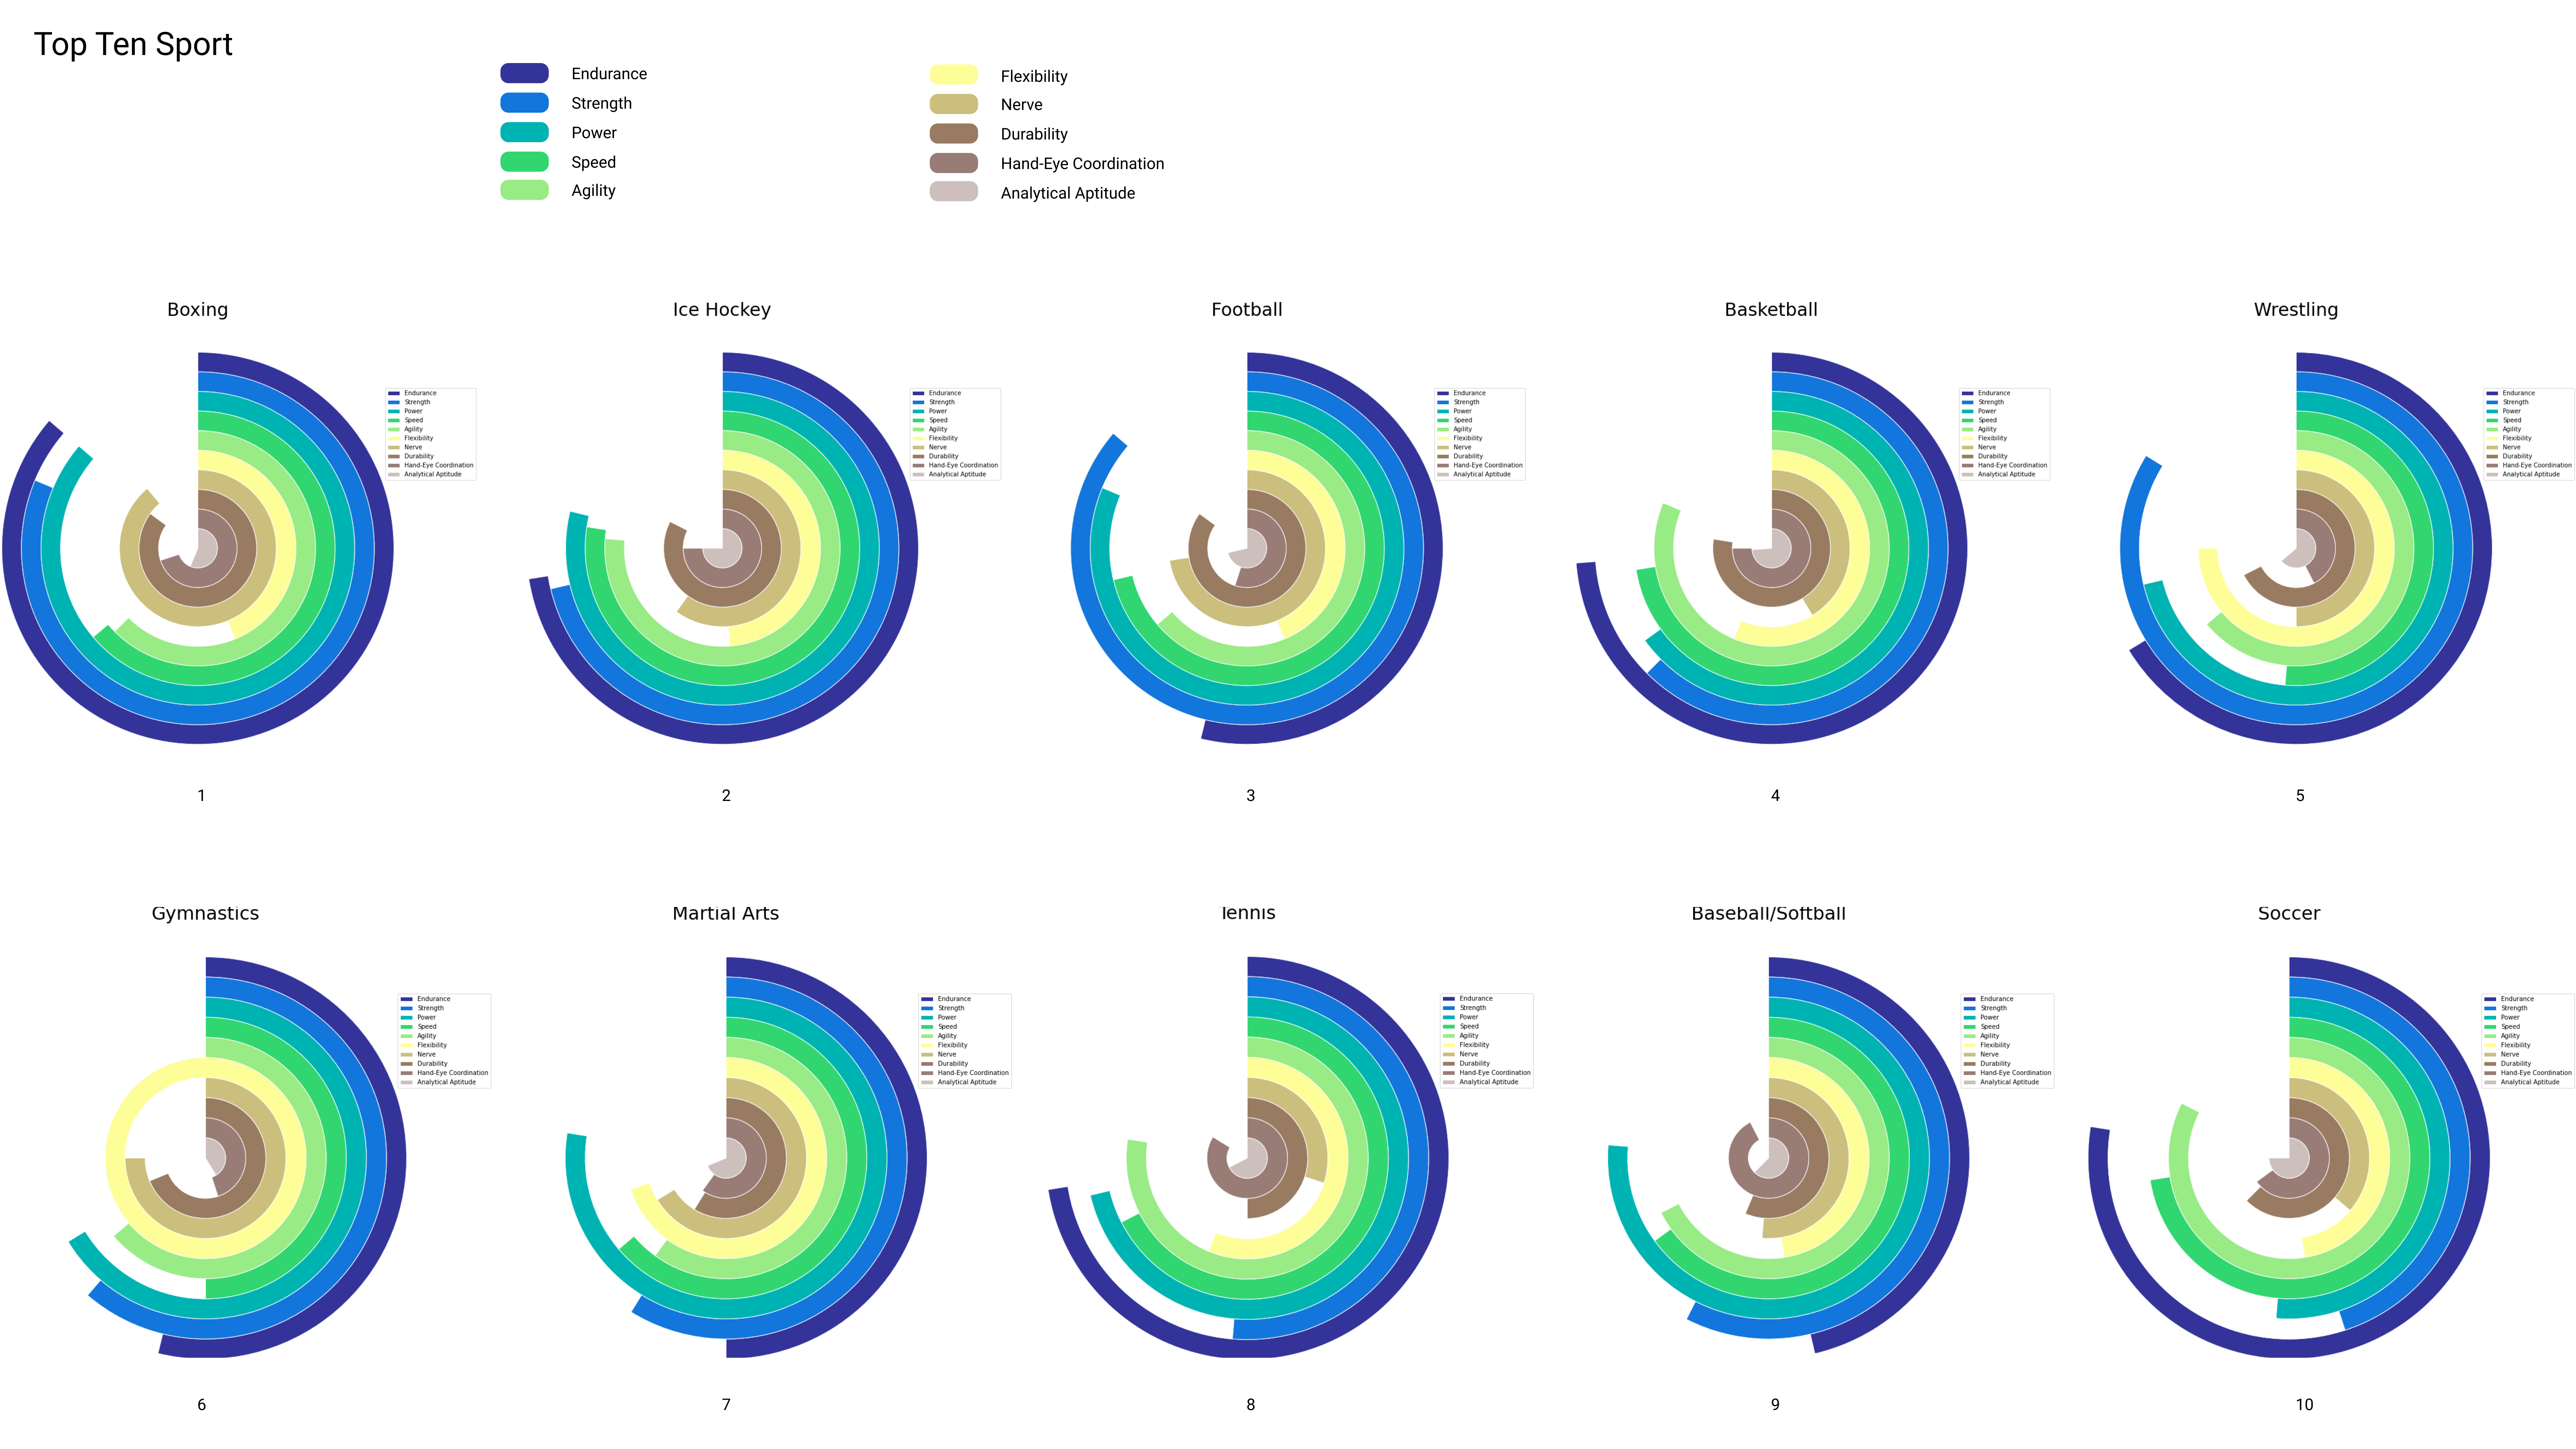